
# Project: Investigate a Dataset - [Soccer database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

   
The datasets used in this project reside in a database with 7 tables (listed below), which have data on the European Soccer leagues:
   + Country
   + League
   + Match
   + Player
   + Player_Attributes
   + Team 
   + Team Attributes

The data in the tables includes 25,000 matches, 11,000 players, 11 European leagues, covering seasons (2008 to 2016), players and teams and their attributes. Some of the data includes details on matches played, goals scored (by home and away teams),  penalties, other player statistics, and betting odds by betting providers. 
Once I familiarize myself with the data, my analysis will focus on the data that will contribute the most to what I would like to report on. 
One of the reasons I chose to work with data which originates from a database is to brush up on my SQL skills, which I have not used in quite a few years.

The relationships between tables are as follows:
   ### Country, League and Match tables:
   The __Country table__ has a list of 11 countries that represents the European soccer league, as well as the country's id.<br>
   The __League table__ has the names of the different leagues in Europe and their country ids <br>
   The __Match table__ has the matches played from 2008 to 2016 in the European leagues, as well as the league id, country id, home and away goals, and team ids and provider bets (home, away, draw odds) <br>
   These three tables have country_id fields which will allow the tables to be joined to get information on matches played, the home and away team ids, goals scored by home and away teams, the leagues that the teams are associated with and the countries
        __Country (id, name) & League (id, country_id, name)__ relationship is <br> __Country.id = League.id & League.country_id =
        Match.country_id__;
   ### Player and Player_Attributes tables:
   The combined tables provide information on the players, such as their names, biometric and detailed soccer related statistics, some of which are possessions, penalties, dribbling, sprint speed, agility, passing reactions, e.t.c : <br>
   
   Both tables have the same player_api_id and player_fifa_api_id fields, thus allowing them to be joined to provide extensive data on players, i.e. <br>
            __Player.player_api_id = Player_Attributes.player_api_id, <br>
            Player.player_fifa_api_id = Player_Attributes.player_fifa_api_id__ <br>
        The fields chosen from __Player were - id, player_api_id, player_name, player_fifa_api_id, birthday, height, weight__. <br>
        The fields chosen from __Player_Attributes__ include fields that are also in the Player tables, as well as the extensive list of fields which have players' game statistics, as listed above.
            
        
   ### Team and Team_Attributes tables:
   The __Team table__ provides information on the names of the teams in the 11 leagues, and their team and league ids - id, team_api_id, team_fifa_api_id, team_long_name, team_short_name. <br>
   The __Team_Attributes table__ provides additional information on each team, which includes statistics such as buildup play speed, playclass, buildup play dribbling and class, passing, passing class, defence pressure, aggression, team width. <br>
   Both tables have team_api_id and team_fifa_api_id, which were used to merge them. <br>
        
   Additionally, the __Team and Match__ tables can be joined to get information on the matches the home/away teams are affiliated with as well as the goals scored by team. This merger can be further extended to merge with the __League__ table to include any associations with leagues. 
   
   ### Summary of analysis:
   I will be analyzing the data associated with each table and will be interested in looking at the following items, and providing a report:
+ Total home/away goals scored by each league over time - will include a graph showing highest and lowest total goals over the time span
+ The season with the highest/lowest, home/away goals and by which leagues 
+ Teams with the most goals over time
+ Highest rated soccer player, as well as top 5 highest rated soccer players
+ Player with the most penalties, as well as the top 5 players with the highest penalties
+ Average goals per league over time

In [6]:
# This cell includes the import statements for all of the packages that I plan to use, as well as the inline magic word for visualizations plotted.
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt


%matplotlib inline

<a id='wrangling'></a>
## Data wrangling

This section will contain the extraction of data from the SQLite database tables using SQL and the creation of dataframes to hold the data. Data cleaning steps will also be included.

**DATA WRANGLING STEPS** <br>
I will access the data directly from the SQLite database by writing SQL code to connect to the database, and include queries to access the data, to determine the relationships between the data and tables, and check for data cleaniness. I will also look for columns identified with unique values and keys (primary and foreign) to determine efficient ways to join the tables. The data wrangling will cover the following items.

<ul>
<li><a href="#db">Create a path to the database location on my local drive </a></li>
<li><a href="#country">Get data from Country table in SQL database </a></li>
<li><a href="#league">Get data from League table in SQL database</a></li>
<li><a href="#match">Get data from Match table in SQL database</a></li>
<li><a href="#player">Get data from the players table in SQL database</a></li>
<li><a href="#playerattrib">Get player attributes data from table in SQLite database and store in dataframe</a></li>
<li><a href="#team">Get Team data from table in SQLite database</a></li>
<li><a href="#teamattrib">Get team attributes data from table in SQLite database</a></li>
</ul>

#### The downloaded SQLite European soccer database is sourced in Kaggle at this link:
https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite


<a id='db'></a>
### ------------  *_Create a path to the database location on my local drive_* ------------

In [8]:
#Define path where the database is stored Connect to sqlite database
path = "C:\\Users\\mhead\\Documents\\Udacity_Data_Analysis_Nanodegree\\Project_DataSet\\" #Everything preceding the file name
database = path + 'database.sqlite'

In [9]:
#Connect to the database

conn = sqlite3.connect(database)

In [10]:
#Get list of tables stored in the database to confirm all tables 
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


#### This is the beginning of the data load process, which extracts data from each table in SQLite database into individual dataframes.

## <u>Country</u>
<a id='country'></a>
### -----------  *_Get data from <u>Country table</u> in SQL database_*  -----------------

In [11]:
# select from Country table - data appears to be clean
countries = pd.read_sql("""SELECT *
                        FROM Country; """, conn)


countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


## <u>League data</u>
<a id='league'></a>
### --------------  *_Get data from <u>League table</u> in SQL database and store in dataframe_*  ----------

In [12]:
# select all data from league - data appears to be clean
leagues = pd.read_sql("""SELECT *
                        FROM League; """, conn)


leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [13]:
leagues.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [14]:
leagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


#### Leagues data looks clean and datatypes of fields are ok 

## <u>MATCH data </u>
<a id='match'></a>
### ------------- *_Get data from <u>Match table</u> in SQL database and store in a dataframe_* ------------

In [15]:
# select all from Match
matches = pd.read_sql("""SELECT *
                        FROM Match; """, conn)


matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1.0,1.0,2008/2009,1.0,2008-08-17 00:00:00,492473.0,9987.0,9993.0,1.0,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492474.0,10000.0,9994.0,0.0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492475.0,9984.0,8635.0,0.0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1.0,1.0,2008/2009,1.0,2008-08-17 00:00:00,492476.0,9991.0,9998.0,5.0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492477.0,7947.0,9985.0,1.0,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25976,25977,24558.0,24558.0,2015/2016,9.0,2015-09-23 00:00:00,1992093.0,9956.0,10179.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558.0,24558.0,2015/2016,9.0,2015-09-22 00:00:00,1992094.0,7896.0,10243.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558.0,24558.0,2015/2016,9.0,2015-09-23 00:00:00,1992095.0,10192.0,9931.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25979,51959,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### A scan of the data stored in the Match dataframe (above) shows that there are cells with missing data (null/NaN), so data cleaning is needed.
#### There is also a large number of columns with betting odds data from various providers, but I chose not to use them for my analysis and reporting because they are not meaningful, so they will be removed.

In [16]:
matches.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25981.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12992.999846,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7507.136816,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6496.000000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12991.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19486.000000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,51960.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


#### Some observations made based on the description of the matches dataframe are:
+ the maximum goals scored by a home team was 10, and maximum by a away team was 9, over the period 2008 - 2016 
+ the majority of matches scored 2 goals
+ the average goals scored by the home and away teams were 1.5 and 1.16, respectively

In [17]:
#Check Match table to confirm nulls exist
matches.isnull().sum() 

id                0
country_id        2
league_id         2
season            2
stage             2
              ...  
GBD           11819
GBA           11819
BSH           11820
BSD           11820
BSA           11820
Length: 115, dtype: int64

#### Data clean up on match data starts here and data is stored in a new dataframe 'new_matches'.
#### Data will be removed from columns 11 to the end, since some of the data is bad,  some missing and some meaningless for this analysis.

In [18]:
# Remove column 11 onwards and store in a new dataframe 
new_matches = matches.drop(matches.columns[11:], axis = 1)

In [19]:
#Confirm dataframe column count
new_matches.shape

(25981, 11)

In [243]:
# Get summary of dataframe and confirm datatypes and columns with nulls
new_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25981 entries, 0 to 25980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25981 non-null  int64  
 1   country_id        25979 non-null  float64
 2   league_id         25979 non-null  float64
 3   season            25979 non-null  object 
 4   stage             25979 non-null  float64
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  float64
 7   home_team_api_id  25979 non-null  float64
 8   away_team_api_id  25979 non-null  float64
 9   home_team_goal    25979 non-null  float64
 10  away_team_goal    25979 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.2+ MB


In [20]:
#Check Match dataframe for nulls
new_matches.isnull().sum() 

id                  0
country_id          2
league_id           2
season              2
stage               2
date                2
match_api_id        2
home_team_api_id    2
away_team_api_id    2
home_team_goal      2
away_team_goal      2
dtype: int64

In [21]:
new_matches


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1.0,1.0,2008/2009,1.0,2008-08-17 00:00:00,492473.0,9987.0,9993.0,1.0,1.0
1,2,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492474.0,10000.0,9994.0,0.0,0.0
2,3,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492475.0,9984.0,8635.0,0.0,3.0
3,4,1.0,1.0,2008/2009,1.0,2008-08-17 00:00:00,492476.0,9991.0,9998.0,5.0,0.0
4,5,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492477.0,7947.0,9985.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
25976,25977,24558.0,24558.0,2015/2016,9.0,2015-09-23 00:00:00,1992093.0,9956.0,10179.0,2.0,0.0
25977,25978,24558.0,24558.0,2015/2016,9.0,2015-09-22 00:00:00,1992094.0,7896.0,10243.0,0.0,0.0
25978,25979,24558.0,24558.0,2015/2016,9.0,2015-09-23 00:00:00,1992095.0,10192.0,9931.0,4.0,3.0
25979,51959,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN


In [22]:
#Get some summary statistics on the match data
new_matches.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25981.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,12992.999846,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
std,7507.136816,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,6496.000000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,12991.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,19486.000000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,51960.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'country_id'}>,
        <AxesSubplot:title={'center':'league_id'}>],
       [<AxesSubplot:title={'center':'stage'}>,
        <AxesSubplot:title={'center':'match_api_id'}>,
        <AxesSubplot:title={'center':'home_team_api_id'}>],
       [<AxesSubplot:title={'center':'away_team_api_id'}>,
        <AxesSubplot:title={'center':'home_team_goal'}>,
        <AxesSubplot:title={'center':'away_team_goal'}>]], dtype=object)

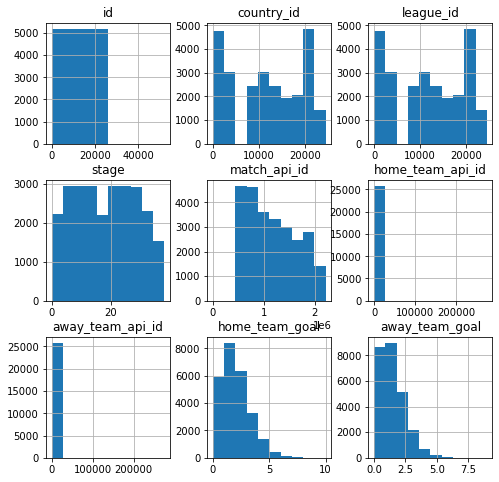

In [58]:
#See match data distribution
new_matches.hist(figsize=(8,8))

#### The graphs show goals scored (during the period 2008 - 2016) by the home and away teams are both skewed to the right, and the majority of goals scored by both teams were under 5. The average goals scored by the home team and away teams were 1.54 and 1.16, respectively. 

In [59]:
#Check for duplicates
new_matches.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25976    False
25977    False
25978    False
25979    False
25980    False
Length: 25981, dtype: bool

In [60]:
# Fill null ('NaN') cells with 0 and view data
new_matches.fillna(0,inplace=True)
new_matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,3
25979,51959,0,0,0,0,0,0,0,0,0,0


#### Change the datatypes of the float fields to int

In [61]:
new_matches = new_matches.astype({'country_id': 'int', 'league_id': 'int','stage': 'int', 'match_api_id':'int', 'home_team_api_id':'int', 
                'away_team_api_id':'int', 'home_team_goal':'int','away_team_goal':'int'}, copy=False)

In [62]:
#Confirm datatype changes
new_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25981 entries, 0 to 25980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25981 non-null  int64 
 1   country_id        25981 non-null  int32 
 2   league_id         25981 non-null  int32 
 3   season            25981 non-null  object
 4   stage             25981 non-null  int32 
 5   date              25981 non-null  object
 6   match_api_id      25981 non-null  int32 
 7   home_team_api_id  25981 non-null  int32 
 8   away_team_api_id  25981 non-null  int32 
 9   home_team_goal    25981 non-null  int32 
 10  away_team_goal    25981 non-null  int32 
dtypes: int32(8), int64(1), object(2)
memory usage: 1.4+ MB


### -----------------------------------------------   End of match data cleaning  -------------------------------------------------

## <u>Player data</u>
<a id='player'></a>
### ------  *_Get data from the player table in SQL database and store in dataframe _* -----------

In [63]:
# select all data from Player
players = pd.read_sql("""SELECT *
                        FROM Player; """, conn)


players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


#### Check data for nulls and confirm datatypes 

In [64]:
#Check for nulls and data type of fields --- data is  clean
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [65]:
#Check for duplicates
players.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11055    False
11056    False
11057    False
11058    False
11059    False
Length: 11060, dtype: bool

### ----------------- Player data looks clean, and data types are ok-----------------------

## <u> Player attributes data</u>
<a id='playerattrib'></a>
### *_Get player attributes data from table in SQLite database and store in dataframe_*

In [66]:
# Get all data from Player attributes
player_attributes = pd.read_sql("""SELECT *
                        FROM Player_attributes; """, conn)


player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [67]:
#Get summary of dataframe and check for nulls and data type of fields --- data is clean
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

#### Remove the rows which have missing data, beyond the player id fields (i.e. data missing from more than 5 columns). I did a visual scan of the database confirmed that these rows are missing data.

In [68]:
#Remove rows which only have data in id, player_fifa_api_id, player_id and date columns
player_attributes.dropna(thresh=5, inplace=True)

In [69]:
#Look for other missing data
player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle     

In [70]:
#fill nulls with 0
player_attributes = player_attributes.fillna(value=0)
player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [71]:
#Replace values "_0" in defensive work rate field with '' 
player_attributes.replace('_0', '', inplace=True)

In [72]:
#Check for nulls and data type of fields --- data is  clean
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183142 non-null  int64  
 1   player_fifa_api_id   183142 non-null  int64  
 2   player_api_id        183142 non-null  int64  
 3   date                 183142 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  183142 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              183142 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [73]:
# player_attributes[player_attributes.player_api_id == 34487]
player_attributes.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
183973    False
183974    False
183975    False
183976    False
183977    False
Length: 183142, dtype: bool

## <u>Team data</u>
<a id='team'></a>
### --------- *_Get Team data from table in SQLite database_*  ------------

In [94]:
# select all from Team 
team = pd.read_sql("""SELECT *
                        FROM Team; """, conn)


team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [95]:
#Check for nulls and data type of fields --- data is  clean
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [96]:
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [97]:
#Fill null/Nan fields with 0
team.fillna(value=0, inplace=True)

In [98]:
team.isnull().sum()

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64

In [99]:
#Change the datatype of team_fifa_api_id to int
team.astype({'team_fifa_api_id' : 'int'} )

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC
2,3,10000,15005,SV Zulte-Waregem,ZUL
3,4,9994,2007,Sporting Lokeren,LOK
4,5,9984,1750,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898,FC St. Gallen,GAL
295,49837,10191,1715,FC Thun,THU
296,50201,9777,324,Servette FC,SER
297,50204,7730,1862,FC Lausanne-Sports,LAU


## <u>Team attributes data</u>
<a id='teamattrib'></a>
### ------- *_Get team attributes data from table in SQLite database_* --------

In [100]:
# select all from Team attributes
team_attributes = pd.read_sql("""SELECT *
                        FROM Team_Attributes; """, conn)


team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [101]:
#Examine datatypes in team_attributes dataframe, and check columns non-null count
team_attributes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [102]:
#Confirm nulls in dataframe
team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [103]:
# buildUpPlayDribbling has nulls, so replace with 0
team_attributes.fillna(value=0, inplace=True)

In [104]:
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,0.0,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,0.0,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,0.0,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,0.0,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,0.0,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,0.0,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [105]:
#Change the datatype of buildUpPlayDribbling from float to int
team_attributes.astype({'buildUpPlayDribbling' : 'int'} )

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,0,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,0,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,0,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,0,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,0,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,0,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [106]:
#Check for duplicates
team_attributes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1453    False
1454    False
1455    False
1456    False
1457    False
Length: 1458, dtype: bool

## ---------------------------------------- End of data cleaning -------------------------------- 

<a id='eda'></a>
## Exploratory Data Analysis

### Summary of dataframes created in the Data wrangling section:
+ countries
+ leagues
+ new_match
+ players
+ player_attributes
+ team
+ team_attributes


<ul>
<li><a href="#homeawaygoals">1. Data analysis on the total home/away goals scored by each league over time</a></li>
<li><a href="#leaguegoals">1.1 Goals scored by leagues each season from 2008 to 2016</a></li>
<li><a href="#seasongoals">2. Data analysis to find the highest/lowest home and away goals scored each season, by each league - from 2008 to 2016</a></li>
<li><a href="#teamgoals">3. Teams with the most goals over time</a></li>
<li><a href="#topplayers">4. Get the highest rated soccer player, as well as the top 5 rated</a></li>
<li><a href="#penalty">5. Get the top 5 players with the most penalty kicks</a></li>
</ul>

<a id='homeawaygoals'></a>
### 1. Data analysis on the total home/away goals scored by each league over time
  ### This will require data from match (in new_matches dataframe) and leagues dataframes to be merged.

In [107]:
#Merge new_match and league 
league_matches = pd.merge(new_matches, leagues, how="inner", left_on='country_id', right_on='country_id')
league_matches

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,24558,Switzerland Super League
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,24558,Switzerland Super League
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,24558,Switzerland Super League
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,24558,Switzerland Super League


In [108]:
#Rename the columns in the dataframe
league_matches.rename(columns={'country_id': 'Country id', 'league_id': 'League id', 'season': 'Season',
                               'stage': 'Stage','date': 'Date','match_api_id': 'Match Api Id','home_team_api_id': 'Home Team Api Id',
                               'away_team_api_id': 'Away Team Api Id', 'home_team_goal': 'Home Team Goals',
                               'away_team_goal': 'Away Team Goals',
                               'name': 'Name'}, inplace=True)


In [109]:
#Get the totals home and away goals for each league
total_home_away_goals_per_league = league_matches.groupby([ 'Name'])[['Home Team Goals', 'Away Team Goals']].sum()
total_home_away_goals_per_league

,Home Team Goals,Away Team Goals
Name,,
Belgium Jupiler League,2781,2060
England Premier League,4715,3525
France Ligue 1,4265,3162
Germany 1. Bundesliga,3982,3121
Italy Serie A,4528,3367
Netherlands Eredivisie,4357,3185
Poland Ekstraklasa,2678,1978
Portugal Liga ZON Sagres,2890,2311
Scotland Premier League,2607,2197


<AxesSubplot:title={'center':'Goals scored by leagues from 2008 to 2016'}, xlabel='Leagues', ylabel='Goals scored'>

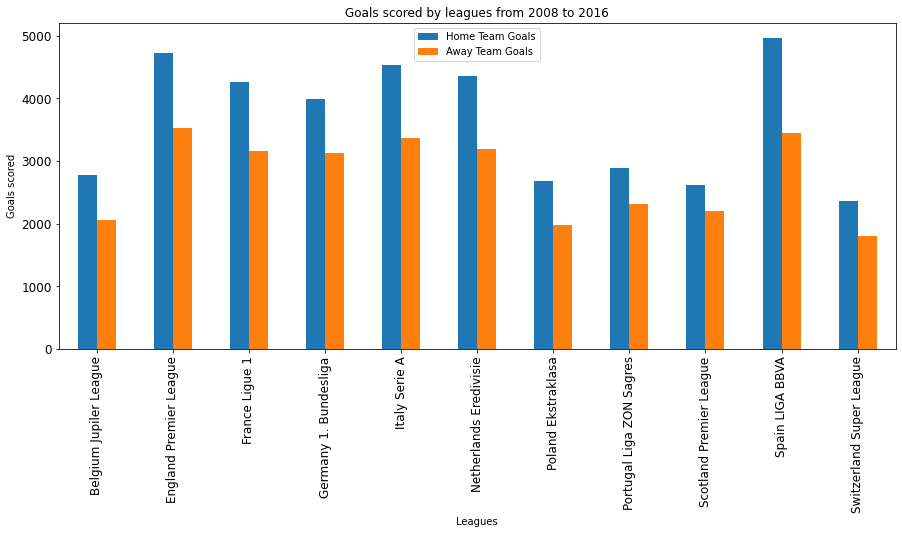

In [90]:
#plot bar chart to see graphical display of data above 
total_home_away_goals_per_league.plot(kind='bar', fontsize= 12, figsize = (15,6), 
                                      title="Goals scored by leagues from 2008 to 2016", 
                                      xlabel='Leagues', 
                                      ylabel='Goals scored',
                                    legend = True)


### <u>Findings on the total home/away goals scored by each league over time</u>:
#### The graph above shows the _highest home goals_ were scored by 'Spain LIGA BBVA League' and the _highest away team goals_ were scored by the 'England Premier League', between 2008 and 2016.

#### The _lowest home and away goals_ were scored by 'Switzerland Super League'.

<a id='leaguegoals'></a>
### 1.1 Goals scored by leagues each season from 2008 to 2016

### This analysis will require data to be merged from new_matches, leagues and team dataframes

In [110]:
league_matches

,id_x,Country id,League id,Season,Stage,Date,Match Api Id,Home Team Api Id,Away Team Api Id,Home Team Goals,Away Team Goals,id_y,Name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,24558,Switzerland Super League
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,24558,Switzerland Super League
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,24558,Switzerland Super League
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,24558,Switzerland Super League


In [112]:
#Merge league_matches dataframe with team dataframe

league_match_team = pd.merge(league_matches, team, how="inner", left_on='Home Team Api Id', right_on='team_api_id')
league_match_team 

,id_x,Country id,League id,Season,Stage,Date,Match Api Id,Home Team Api Id,Away Team Api Id,Home Team Goals,Away Team Goals,id_y,Name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,9999,1,1,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,9984,3,2,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,9986,1,0,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,9998,2,0,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25936,24558,24558,2015/2016,34,2016-05-16 00:00:00,1992217,7896,10192,1,3,24558,Switzerland Super League,51606,7896,0.0,Lugano,LUG
25975,25946,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992226,7896,10190,3,0,24558,Switzerland Super League,51606,7896,0.0,Lugano,LUG
25976,25960,24558,24558,2015/2016,6,2015-08-22 00:00:00,1992076,7896,9931,1,3,24558,Switzerland Super League,51606,7896,0.0,Lugano,LUG
25977,25965,24558,24558,2015/2016,7,2015-08-29 00:00:00,1992081,7896,10199,0,1,24558,Switzerland Super League,51606,7896,0.0,Lugano,LUG


In [117]:
#Group data by season and name
goals_per_league_season = league_match_team.groupby(['Season', 'Name'])[['Season','Name', 'Home Team Goals', 'Away Team Goals']].sum()
goals_per_league_season

Home Team Goals  Away Team Goals
Season    Name                                                      
2008/2009 Belgium Jupiler League                499              356
          England Premier League                532              410
          France Ligue 1                        489              369
          Germany 1. Bundesliga                 520              374
          Italy Serie A                         578              410
...                                             ...              ...
2015/2016 Poland Ekstraklasa                    341              294
          Portugal Liga ZON Sagres              463              368
          Scotland Premier League               343              307
          Spain LIGA BBVA                       615              428
          Switzerland Super League              321              245

[88 rows x 2 columns]

In [118]:
#Calculate total goals by each league every season
goals_per_league_season['total_goals'] = goals_per_league_season['Home Team Goals'] + goals_per_league_season['Away Team Goals']
goals_per_league_season

Home Team Goals  Away Team Goals  \
Season    Name                                                         
2008/2009 Belgium Jupiler League                499              356   
          England Premier League                532              410   
          France Ligue 1                        489              369   
          Germany 1. Bundesliga                 520              374   
          Italy Serie A                         578              410   
...                                             ...              ...   
2015/2016 Poland Ekstraklasa                    341              294   
          Portugal Liga ZON Sagres              463              368   
          Scotland Premier League               343              307   
          Spain LIGA BBVA                       615              428   
          Switzerland Super League              321              245   

                                    total_goals  
Season    Name                                   
2008/2009 Belgium Jupiler League            855  
          England Premier League            942  
          France Ligue 1                    858  
          Germany 1. Bundesliga             894  
          Italy Serie A                     988  
...                                         ...  
2015/2016 Poland Ekstraklasa                635  
          Portugal Liga ZON Sagres          831  
          Scotland Premier League           650  
          Spain LIGA BBVA                  1043  
          Switzerland Super League          566  

[88 rows x 3 columns]

In [121]:
#Store the data to a file because I am having issues creating a graph with the dataframe in the format it is in goals_per_league_season
goals_per_league_season.to_csv("C:\\Users\\mhead\\Documents\\Udacity_Data_Analysis_Nanodegree\\Project_DataSet\\goals_league.csv" )

In [124]:
#Get data from csv file
league_goals_season = pd.read_csv("C:\\Users\\mhead\\Documents\\Udacity_Data_Analysis_Nanodegree\\Project_DataSet\\goals_league.csv")
league_goals_season

,Season,Name,Home Team Goals,Away Team Goals,total_goals
0,2008/2009,Belgium Jupiler League,499,356,855
1,2008/2009,England Premier League,532,410,942
2,2008/2009,France Ligue 1,489,369,858
3,2008/2009,Germany 1. Bundesliga,520,374,894
4,2008/2009,Italy Serie A,578,410,988
...,...,...,...,...,...
83,2015/2016,Poland Ekstraklasa,341,294,635
84,2015/2016,Portugal Liga ZON Sagres,463,368,831
85,2015/2016,Scotland Premier League,343,307,650
86,2015/2016,Spain LIGA BBVA,615,428,1043


<AxesSubplot:xlabel='Season'>

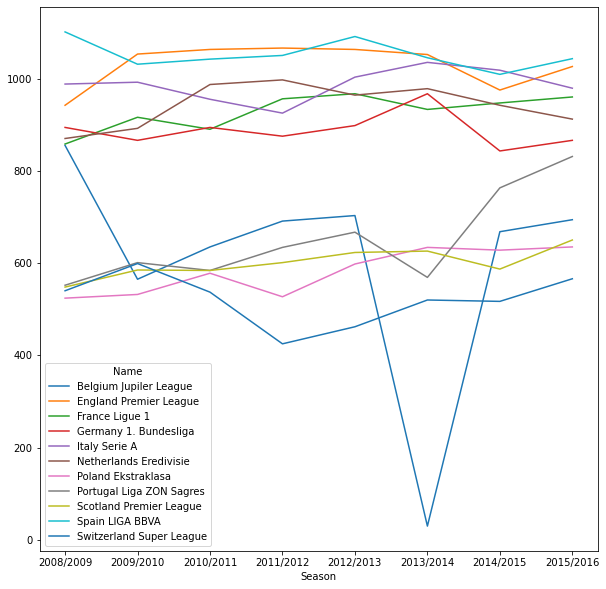

In [125]:
league_goals_season.pivot(index='Season', columns='Name', values='total_goals').plot(figsize=(10,10))

#### A small note with regards to the graph above. I was not able to find information on how to add a label to the y axis and a title for the graph.

### Conclusion of analysis of the graph above:

#### The graph gives a good illustration of the performance of the different leagues each season, between 2008 and 2016. The y-axis represents the total goals scored over the seasons. One thing that stands out is the drastic drop in performance of the Belgium Jupiler League during the 2013/2014 season, but the league improved significantly the next season, and continued to get better. Based on a quick comparison of this league with the other leagues I'm inclined to say that the Belgium Jupiler League was the most improved, due to the drastic increase in performance in just one season.  

<a id='seasongoals'></a>
### 2. Data analysis to find the highest/lowest home and away goals scored each season, by each league - from 2008 to 2016

In [126]:
season_top_scorer = league_matches.groupby(['Season', 'Name'])[['Home Team Goals', 'Away Team Goals']].sum()
season_top_scorer

Home Team Goals  Away Team Goals
Season    Name                                                      
2008/2009 Belgium Jupiler League                499              356
          England Premier League                532              410
          France Ligue 1                        489              369
          Germany 1. Bundesliga                 520              374
          Italy Serie A                         578              410
...                                             ...              ...
2015/2016 Poland Ekstraklasa                    341              294
          Portugal Liga ZON Sagres              463              368
          Scotland Premier League               343              307
          Spain LIGA BBVA                       615              428
          Switzerland Super League              321              245

[88 rows x 2 columns]

array([<AxesSubplot:title={'center':'Home Team Goals'}, xlabel='Seasons', ylabel='Goals scored'>,
       <AxesSubplot:title={'center':'Away Team Goals'}, xlabel='Seasons', ylabel='Goals scored'>],
      dtype=object)

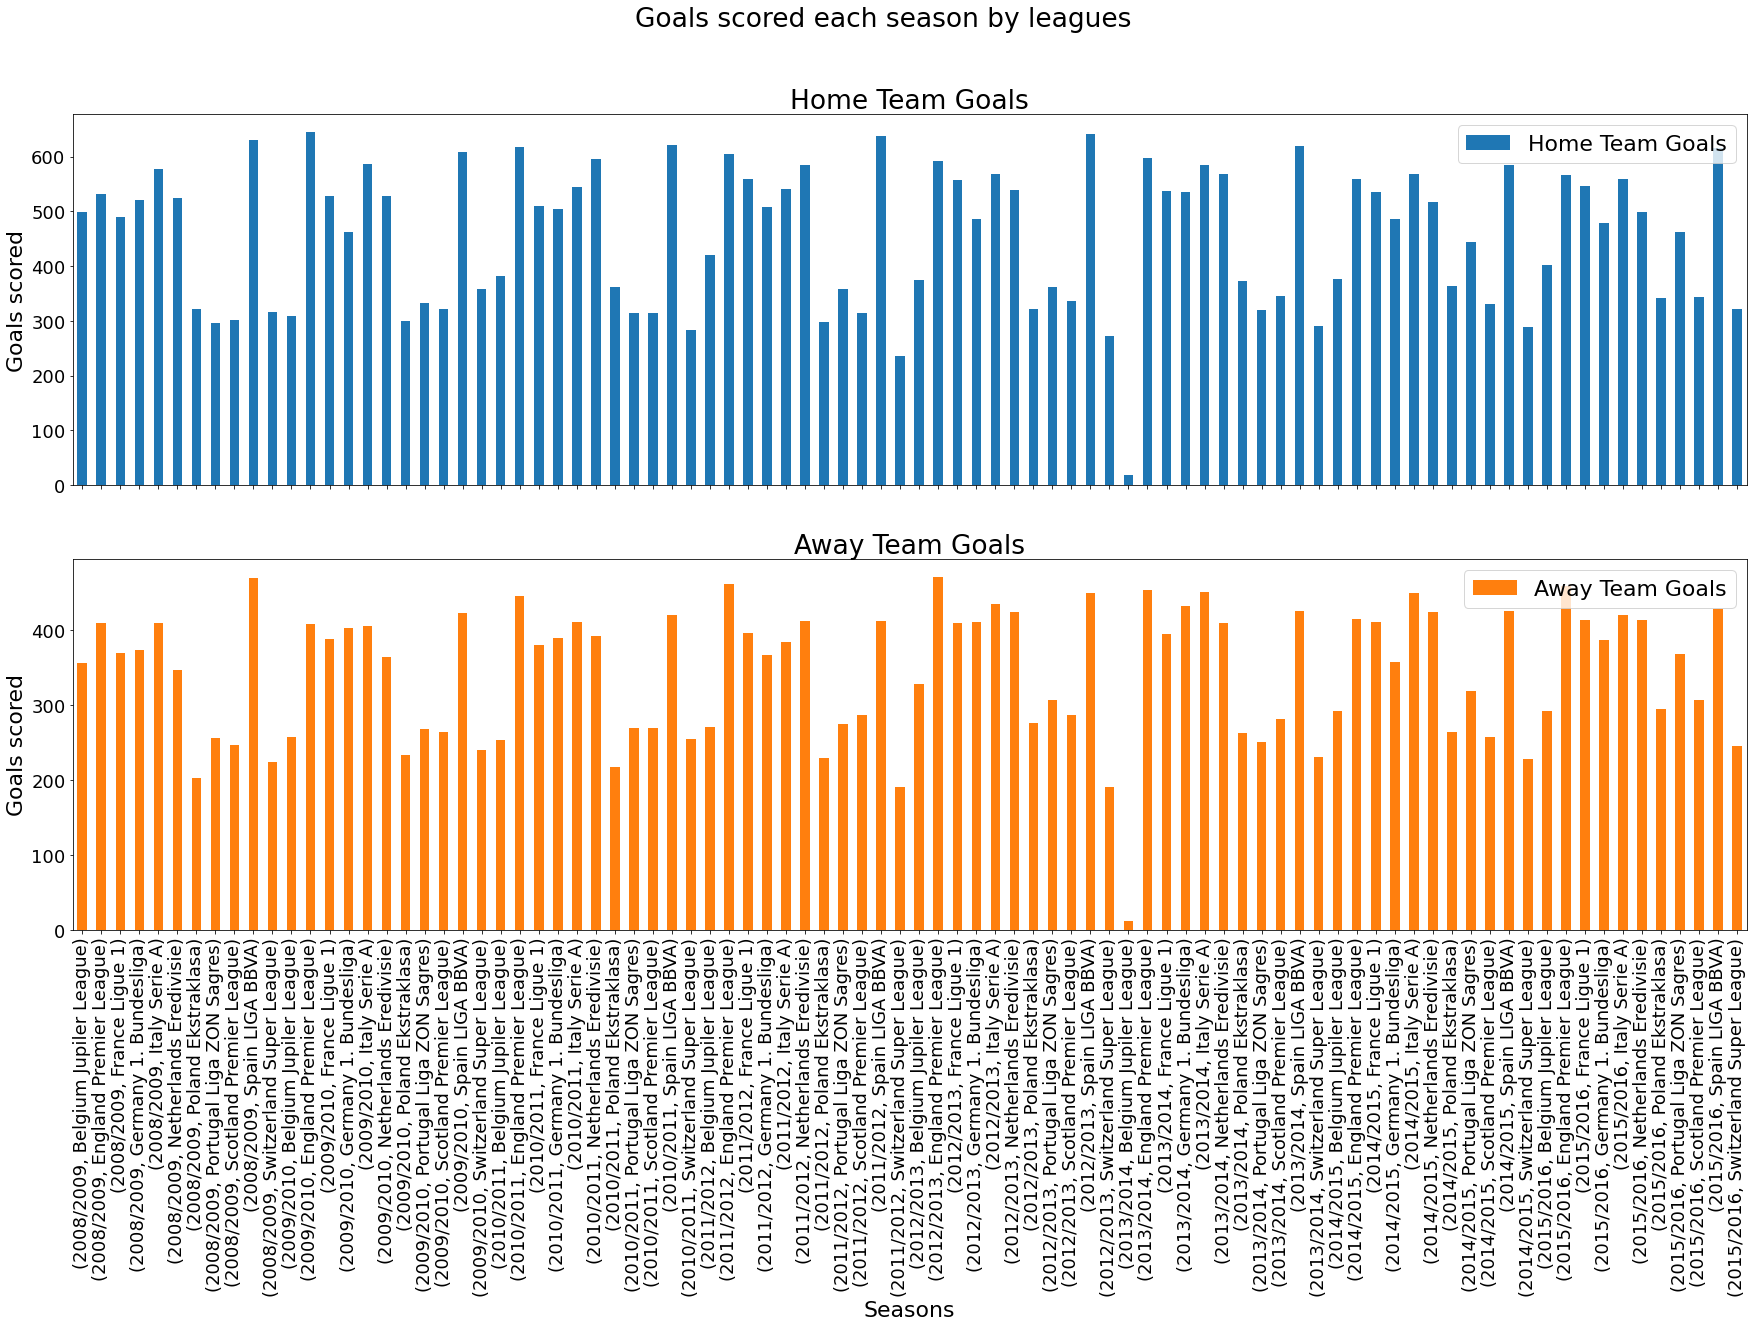

In [379]:
#Plot of each leagues Home/Away Team Goals per season
plt.rcParams.update({'font.size': 22}) 
season_top_scorer.plot(kind='bar', fontsize= 18, figsize = (30,15), 
                                      title="Goals scored each season by leagues", 
                                      xlabel='Seasons',
                          
                                      ylabel='Goals scored', 
                                     subplots=True,
                                    legend = True)


In [127]:
season_top_scorer.max()

Home Team Goals    645
Away Team Goals    471
dtype: int32

### Verifying the season with the <u>_most home goals_</u> and which league scored the goals 

In [128]:
#League with the highest home team goals
home_top_scorer =season_top_scorer[season_top_scorer['Home Team Goals'] == season_top_scorer['Home Team Goals'].max()]
home_top_scorer

,,Home Team Goals,Away Team Goals
Season,Name,,
2009/2010,England Premier League,645,408


### Verifying the season with the <u>_most away goals_</u> and which league scored the goals 

In [129]:
#League with the highest away team goals
away_top_scorer =season_top_scorer[season_top_scorer['Away Team Goals'] == season_top_scorer['Away Team Goals'].max()]
away_top_scorer

,,Home Team Goals,Away Team Goals
Season,Name,,
2012/2013,England Premier League,592,471


### Verifying the season with the <u>_lowest home goals_</u> and which league scored the goals 

In [130]:
#League with the lowest home goals
home_lowest_scorer =season_top_scorer[season_top_scorer['Home Team Goals'] == season_top_scorer['Home Team Goals'].min()]
home_lowest_scorer

,,Home Team Goals,Away Team Goals
Season,Name,,
2013/2014,Belgium Jupiler League,18,12


### Verifying the season with the <u>_lowest away goals_</u> and which league scored the goals 

In [131]:
#League with the lowest away goals
away_lowest_scorer =season_top_scorer[season_top_scorer['Away Team Goals'] == season_top_scorer['Away Team Goals'].min()]
away_lowest_scorer

,,Home Team Goals,Away Team Goals
Season,Name,,
2013/2014,Belgium Jupiler League,18,12


### <u>Analysis on the information outlined above on the highest and lowest home/away goals scored over all seasons by which leagues</u>:
#### The graph above shows the _highest home goals_ were scored by 'Spain LIGA BBVA League' and the _highest away team goals_ were scored by the 'England Premier League', between 2008 and 2016.

#### The _lowest home and away goals_ were scored by 'Switzerland Super League'.


#### The queries confirmed that the graph shows that the <u>English Primier league had the most home and away goals</u> in a season - the seasons were 2009/2010 and 2012/2013, respectively.
#### The league with <u>the lowest score was Belgium Jupiler League</u> during the 2013/2014 season.

<a id='teamgoals'></a>
### 3. Teams with the most goals over time
### To fulfill this analysis, the data in new_match and team dataframes need to be merged, because the home and away team goals per match are in new_matches and the name of the teams are in the team database.

In [132]:
#Join new_matches and team
match_and_team = pd.merge(new_matches, team, how="inner", left_on='home_team_api_id', right_on='team_api_id')
match_and_team

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9987,9999,1,1,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9987,9984,3,2,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9987,9986,1,0,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9987,9998,2,0,1,9987,673.0,KRC Genk,GEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25936,24558,24558,2015/2016,34,2016-05-16 00:00:00,1992217,7896,10192,1,3,51606,7896,0.0,Lugano,LUG
25975,25946,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992226,7896,10190,3,0,51606,7896,0.0,Lugano,LUG
25976,25960,24558,24558,2015/2016,6,2015-08-22 00:00:00,1992076,7896,9931,1,3,51606,7896,0.0,Lugano,LUG
25977,25965,24558,24558,2015/2016,7,2015-08-29 00:00:00,1992081,7896,10199,0,1,51606,7896,0.0,Lugano,LUG


In [133]:
#Get home team goals by teams
home_match_teams = match_and_team.groupby(['team_long_name'])['home_team_goal'].sum()
home_match_teams

team_long_name
1. FC Kaiserslautern         37
1. FC Köln                  116
1. FC Nürnberg              108
1. FSV Mainz 05             171
AC Ajaccio                   64
                           ... 
Xerez Club Deportivo         20
Zagłębie Lubin              116
Zawisza Bydgoszcz            43
Évian Thonon Gaillard FC    105
Śląsk Wrocław               176
Name: home_team_goal, Length: 296, dtype: int32

### Top five goals by home teams

In [134]:
#Get top five teams by most home goals
home_match_top_five = home_match_teams.nlargest(5,  keep='last')
home_match_top_five

team_long_name
Real Madrid CF      505
FC Barcelona        495
Celtic              389
FC Bayern Munich    382
PSV                 370
Name: home_team_goal, dtype: int32

<AxesSubplot:title={'center':'The top five highest scoring home teams from 2008 - 2016'}, xlabel='Home Teams', ylabel='Goals scored'>

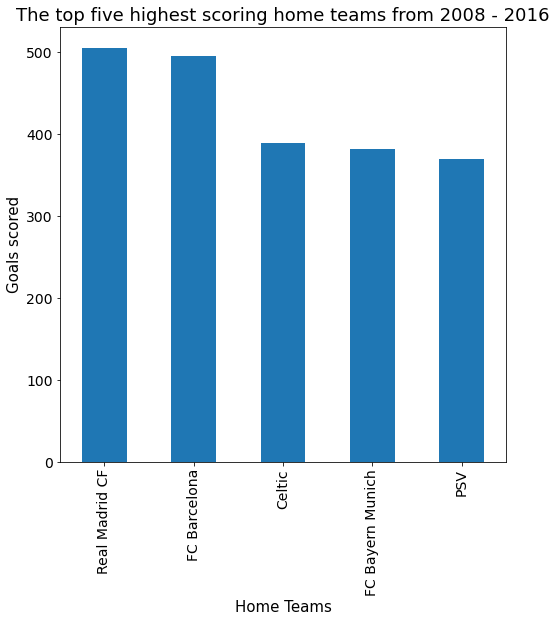

In [377]:
#plot a bar graph
plt.rcParams.update({'font.size': 15}) 
home_match_top_five.plot(kind='bar', fontsize= 14, figsize = (8,8), 
                                      title="The top five highest scoring home teams from 2008 - 2016", 
                                      xlabel='Home Teams', 
                                      ylabel='Goals scored',
                                    legend = False)

### Top five away teams

In [135]:
#Get away team goals by teams
away_match_teams = match_and_team.groupby(['team_long_name'])['away_team_goal'].sum()
away_match_teams

team_long_name
1. FC Kaiserslautern         47
1. FC Köln                  139
1. FC Nürnberg              118
1. FSV Mainz 05             129
AC Ajaccio                   77
                           ... 
Xerez Club Deportivo         29
Zagłębie Lubin              108
Zawisza Bydgoszcz            38
Évian Thonon Gaillard FC    103
Śląsk Wrocław               107
Name: away_team_goal, Length: 296, dtype: int32

In [137]:
#Get the top five scoring away teams
away_match_top_five = away_match_teams.nlargest(5,  keep='last')
away_match_top_five

team_long_name
Kilmarnock          238
SV Werder Bremen    203
SC Heerenveen       202
Motherwell          201
ADO Den Haag        200
Name: away_team_goal, dtype: int32

<AxesSubplot:title={'center':'The top five highest scoring away teams from 2008 - 2016'}, xlabel='Away Teams', ylabel='Goals scored'>

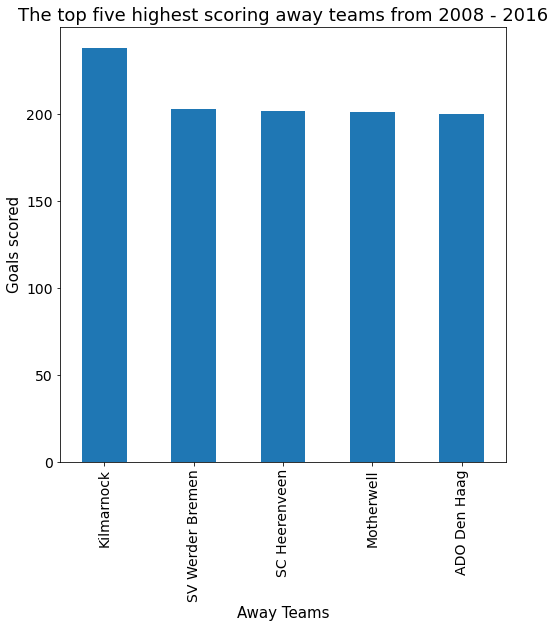

In [378]:
#plot a bar graph
plt.rcParams.update({'font.size': 15}) 
away_match_top_five.plot(kind='bar', fontsize= 14, figsize = (8,8), 
                                      title="The top five highest scoring away teams from 2008 - 2016", 
                                      xlabel='Away Teams', 
                                      ylabel='Goals scored',
                                      legend = False)

### <u>Analysis on the exploration of the top 5 scoring home/away teams over the time period 2008 - 2016 </u>:
#### The home team graph above shows the _highest scoring home teams_ are _Real Madrid CF_ with 505 goals_ , _FC Barcelona_ with 495 goals, _Celtic_ with 389 goals, _FC Bayern Munich_ with 382 goals and _PSV_ with 370 goals.  
#### The away team graph above shows the _highest scoring goals _ are by _Kilmarnock_ with 238 goas, _SV Werder Bremen_ with 203 goals, _SC Heerenveen_ with 202 goals, _Motherwell_ with 201 goals, and _ADO Den Haag_ with 200 goals.
#### This analysis shows that the home teams scored higher goals than the away team, which seem to indicate that home teams may have had better support from fans, and is generally consistent with most other team sports.  


<a id='topplayers'></a>
### 4. Get the highest rated soccer player, as well as the top 5 rated
### This will require the Player and Player attributes dataframes to be merged

In [138]:
players_player_attributes = pd.merge(players, player_attributes, how="inner", left_on='player_api_id', right_on='player_api_id')
players_player_attributes

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183137,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,2009-08-30 00:00:00,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183138,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,2009-02-22 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183139,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,2008-08-30 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183140,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,2007-08-30 00:00:00,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [139]:
#get max rating from player_attributes
max_rating = player_attributes[player_attributes['overall_rating'] == player_attributes['overall_rating'].max()]
max_rating

#Chose the top most value in the 2nd column of the max_rating dataframe to get the player_api_id of the highest rated player
player_id = max_rating.iloc[0,1:]

In [140]:
#Get highest rated player's name, birthdate, height, weight and player id, using the player_api_id returned in the previous code cell
top_rated_player = players.loc[players['player_api_id'] == player_id[1]]
top_rated_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


#### Conclusion: The analysis shows that the highest rated European soccer player between 2008 and 2016 was Lionel Messi.

<a id='penalty'></a>
## 5. Get the top 5 players with the most penalty kicks

In [141]:
#Get the data from the merged player and player attributes dataframe 'players_player_attributes'
players_penalties = players_player_attributes.groupby(['player_name'])[['player_name','birthday','height','penalties']].max().sort_values('penalties',ascending=False)
top_five_penalties = players_penalties.nlargest(5, columns="penalties",  keep='last')

# players_penalties
top_five_penalties

,player_name,birthday,height,penalties
player_name,,,,
Rickie Lambert,Rickie Lambert,1982-02-16 00:00:00,187.96,96.0
Paul Scholes,Paul Scholes,1974-11-16 00:00:00,170.18,95.0
Mario Balotelli,Mario Balotelli,1990-08-12 00:00:00,187.96,95.0
Xavi Hernandez,Xavi Hernandez,1980-01-25 00:00:00,170.18,95.0
Andrea Pirlo,Andrea Pirlo,1979-05-19 00:00:00,177.80,95.0


In [142]:
top_five_penalties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Rickie Lambert to Andrea Pirlo
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  5 non-null      object 
 1   birthday     5 non-null      object 
 2   height       5 non-null      float64
 3   penalties    5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


## Plot players with top five penalties

<AxesSubplot:title={'center':'Players with the top five penalty goals'}, xlabel='Player', ylabel='Penalties'>

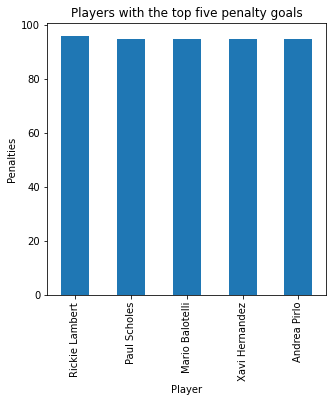

In [733]:
top_five_penalties.plot(kind='bar', fontsize= 10, figsize = (5,5), 
                                      title="Players with the top five penalty goals", 
                                      x='player_name',
                                      y = 'penalties',
                                      xlabel='Player', 
                                      ylabel='Penalties',
                                    legend = False)


#### The top five penalties scored were 96 by player 'Rickie Lambert' and 95 by players 'Paul Scholes', 'Mario Balotelli', 'Xavi Hernandez' and 'Andrea Pirlo'.  

#### The following covers additional exploration of the data to see if there are other variables that are associated with penalty goals scored by a player.  

In [145]:
#import datetime to calculate the age of the players with the top five penalties
from datetime import datetime, date

#### Calculate the players average age to see if there might be any association with their penalities

#### The following code cells were used to calculate the age of players to see if there might be a direct corellation with the penalties kicks , but since the results were not conclusive they were excluded.

In [152]:
#Calculate average age of all players (up to 2016) and add age column to players_player_attributes dataframe
players_player_attributes['year'] = players_player_attributes['birthday'].apply(pd.to_datetime).dt.year

players_player_attributes['age'] = 2016 - players_player_attributes['year'] 
players_player_attributes

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992,24
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992,24
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1992,24
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1992,24
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1992,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183137,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,2009-08-30 00:00:00,...,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1982,34
183138,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,2009-02-22 00:00:00,...,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1982,34
183139,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,2008-08-30 00:00:00,...,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1982,34
183140,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,2007-08-30 00:00:00,...,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1982,34


In [153]:
#Create dataframe with selected columns containing player names, average penalties and average age of all players
all_players_age = players_player_attributes.groupby(['player_name'])[['player_name','penalties', 'age']].mean()
all_players_age

,penalties,age
player_name,,
Aaron Appindangoye,47.600000,24.0
Aaron Cresswell,53.121212,27.0
Aaron Doran,60.538462,25.0
Aaron Galindo,41.739130,34.0
Aaron Hughes,52.960000,37.0
...,...,...
Zsolt Low,61.000000,37.0
Zurab Khizanishvili,64.000000,35.0
Zvjezdan Misimovic,70.900000,34.0


<AxesSubplot:title={'center':'The age of players (in 2016) with the top penalties'}, xlabel='Players', ylabel='Average age of the players'>

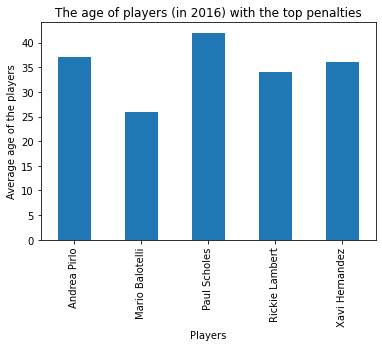

In [154]:
#Plot bar chart of players with the top five highest penalties kicks vs average age of players
chk_players_age = players_player_attributes[players_player_attributes.player_name.isin(["Rickie Lambert", "Paul Scholes", "Mario Balotelli", "Xavi Hernandez", "Andrea Pirlo"])].groupby('player_name').age.mean().plot(kind='bar',
 title="The age of players (in 2016) with the top penalties", 
                                      x='player_name',
                                      y = 'age',
                                      xlabel='Players', 
                                      ylabel='Average age of the players',
                                    legend = False) 

chk_players_age

In [155]:
#Select the average age of the top five penalty players
get_players_age = players_player_attributes[players_player_attributes.player_name.isin(["Rickie Lambert", "Paul Scholes", "Mario Balotelli", "Xavi Hernandez", "Andrea Pirlo"])].groupby(['player_name','age']).age.mean()
get_players_age

player_name      age
Andrea Pirlo     37     37
Mario Balotelli  26     26
Paul Scholes     42     42
Rickie Lambert   34     34
Xavi Hernandez   36     36
Name: age, dtype: int64

Text(0.5, 0, 'Age')

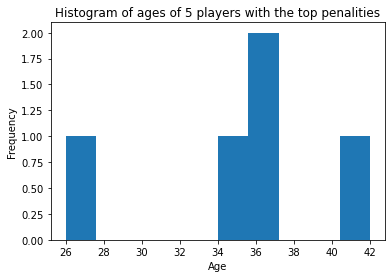

In [156]:
#Create histogram to see frequency and distribution of the average age of the top five penalties

get_players_age.plot(kind='hist', title='Histogram of ages of 5 players with the top penalities')
plt.xlabel('Age')

### The histogram shows a range of ages of the players with the highest penalties goals taken

<AxesSubplot:xlabel='penalties', ylabel='age'>

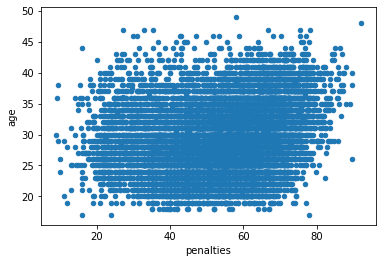

In [157]:
#Because of the volumne of data, I''ve created a scatter plot of penalties vs age of all players to get a better view of any association 
all_players_age.plot(kind='scatter', x='penalties', y='age')

#### The scatter plot shows a cluster of data across the chart, thus a direct correlation between a player's age and the number of penalties cannot be determined. There are also some outliers which show older players had a fairly high number of penalty goals, which can indicate that those penalties may have been racked up due to the length of time the player had been playing in the league.

#### Based on the scatter graph, a direct correlation between age and penalties cannot be made.

#### The following contains further analysis of the top 5 penalty players, to see if their _free kicks accuracy_ numbers can be associated with their high penalty goals. 

In [158]:
#Get the actual average free kicks value corresponding with the graph above
player_freekicks = players_player_attributes[players_player_attributes.player_name.isin(["Rickie Lambert", "Paul Scholes", "Mario Balotelli", "Xavi Hernandez", "Andrea Pirlo"])].groupby('player_name').free_kick_accuracy.mean()

player_freekicks

player_name
Andrea Pirlo       90.488889
Mario Balotelli    76.130435
Paul Scholes       68.846154
Rickie Lambert     75.361111
Xavi Hernandez     86.681818
Name: free_kick_accuracy, dtype: float64

<AxesSubplot:xlabel='player_name', ylabel='Free Kick Accuracy'>

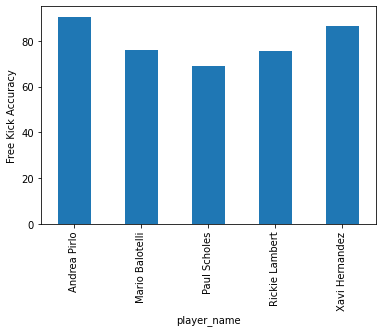

In [159]:
#Plot the average penalty kicks for the top 5 players with the most penalties 
chk_players_freekicks = players_player_attributes[players_player_attributes.player_name.isin(["Rickie Lambert", "Paul Scholes", "Mario Balotelli", "Xavi Hernandez", "Andrea Pirlo"])].groupby('player_name').free_kick_accuracy.mean().plot(kind="bar", ylabel="Free Kick Accuracy")

chk_players_freekicks

Text(0.5, 0, 'Free kicks accuracy')

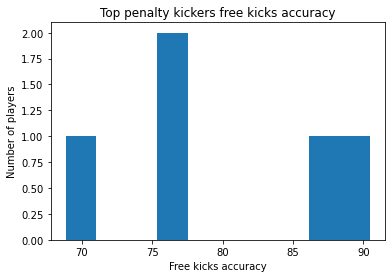

In [164]:
#Histogram of the free kicks for the five players with the top penalties 
plt.hist(player_freekicks)
plt.title('Top penalty kickers free kicks accuracy')
plt.ylabel('Number of players')
plt.xlabel('Free kicks accuracy')


In [165]:
#Get the actual average free kicks value 
freekicks_of_all_players = players_player_attributes.groupby(['player_name'])[['player_name','penalties','free_kick_accuracy']].mean()
freekicks_of_all_players
# all_players_age = players_player_attributes.groupby(['player_name'])[['player_name','penalties', 'age']].mean()
# all_players_age

,penalties,free_kick_accuracy
player_name,,
Aaron Appindangoye,47.600000,38.600000
Aaron Cresswell,53.121212,62.121212
Aaron Doran,60.538462,55.615385
Aaron Galindo,41.739130,40.391304
Aaron Hughes,52.960000,26.360000
...,...,...
Zsolt Low,61.000000,52.571429
Zurab Khizanishvili,64.000000,41.375000
Zvjezdan Misimovic,70.900000,74.200000


<AxesSubplot:xlabel='penalties', ylabel='free_kick_accuracy'>

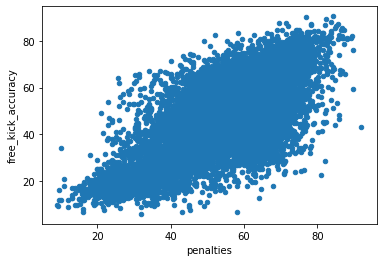

In [166]:
#Creat a scatter plot of penalties vs free kicks accuracy of all players
freekicks_of_all_players.plot(kind='scatter', x='penalties', y='free_kick_accuracy')

#### Conclusion on the relationship between penalty kicks and free kicks accuracy:

#### The bar plot above shows the top five penalties have fairly high percentages of free kicks accuracy. Therefore to explore the data further, a scatter plot was created with the average penalties vs the average free kick accuracy and the results shows a positive correlation between them, which indicates that an increase in free kick accuracy directly correlates with an increase in penalty kicks.  

## Conclusions

#### Since the European soccer data was so vast and stretched across so many tables in a database, one of the key things was to carefully explore the data to identify relationships between the tables, as summarized in the Dataset description section. Once the relationships were established, a deeper analysis was done on the type of information stored in the tables, to determine what will be useful to report and the key datapoints to study. Extensive data cleaning was required to change datatypes, eliminate data redundancy, remove missing data and data that wouldn't be useful.   
#### The 'Spain LIGA BBVA League' scored the highest home goals and the 'England Premier League' scored the highest in away games, and 'Switzerland Super League' scored the lowest home and away goals. This data revealed that the home teams had a positive relationship with home wins, and the away teams a negative relationship with home wins. 
#### Additional analysis on the home and away teams revealed that the top five highest scoring home teams were Real Madrid CF with 505 goals , FC Barcelona with 495, Celtic with 389, FC Bayern Munich with 382 and PSV with 370. The graph above shows the __highest scoring goals by away teams__ were by Kilmarnock with 238, SV Werder Bremen with 203, SC Heerenveen with 202, Motherwell with 201 and ADO Den Haag with 200.
#### The Belgium Jupiler League performed poorly during the 2013/2014 season, as shown by the drastic drop in goals scored, but the very next season there was a major increase in their performance. Additional information may be needed to determine why the league performed so badly and then made such a positive turn around the next season, but based on the analysis, this league can be considered the most improved over the time span of the data provided.
#### The highest rated European soccer player between 2008 and 2016 was Lionel Messi, with a rating of 94%. While other statistics like his agility, reactions, shot power, stamina, accelerations, sprint speed and free kick accuracy were comparitively high, further analysis would be required to determine how they compare with other players, to determine whether they would contribute to his ranking.
#### The top five penalties taken were 96 by player 'Rickie Lambert' and 95 by players 'Paul Scholes', 'Mario Balotelli', 'Xavi Hernandez' and 'Andrea Pirlo'. A detailed investigation was done to determine what other variables may directly correlate with top penalties. The age of the players were analyzed from a scatter plot, but the comparison was clustered, with no clear indication of a direct correlation. The free kick accuracy however did reveal a positive relationship with penalties.


## Limitations

#### Players rankings were provided and Lionel Messi was ranked the highest. Other attributes were looked at to see whether they may have contributed to his ranking.  Some of the attributes looked at from the Match table were foulcommit, possession and card, but no data was provided i some rows and in other rows the data appeared to be invalid. The player attribute table has attributes like agility, reactions, shot power, stamina, accelerations, sprint speed and free kick accuracy, which appeared to be high for Messi. However, further analysis would be required to see the numbers for other players, in addition to their rankings, to see if these attributes factored into a player's ranking.

#### The reasons behind the poor performance of the Belgium Jupiler League during the 2013/2014 season was not quite evident, so further investigation would be required to make that determination.

#### Even though the free kick accuracy rating of the top five penalty players seem to have a direct correlation, more analysis of the data may reveal other attributes that directly contributed.

#### Since the data related to the European soccer league is so vast, further investigation outside the time constraint of this project would offer some more insight into how some of the data is related, to better justify some of the areas explored in this project.  


### References:
1. Stackoverflow and other wed sites to find answers to issues I encountered
2. pandas.pydata.org - to get more information on Pandas function
3. Udacity - reviewed lessons in Introduction to Data Analysis
4. Matplotlib user guide
